In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

: 

In [11]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df['total score'] = round((df['math score']+df['reading score']+df['writing score']) / 3, 1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.3


In [6]:
df.iloc[3]["gender"]

'male'

## Gender Variable

In [7]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

## Race/Ethnicity

In [8]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

## Parental Level Of Education

In [9]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])

In [23]:
def box_plot_gender_score(column):
    df_gender_math = df.groupby("gender")[column].apply(np.array)

    fig = plt.figure(figsize=(10,10))
    ax = fig.subplots(1,1)

    ax.boxplot(df_gender_math, positions=df_gender_math.index, showfliers=False)
    ax.tick_params(axis='x', labelrotation=75)

In [18]:
box_plot_gender_score("reading score")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

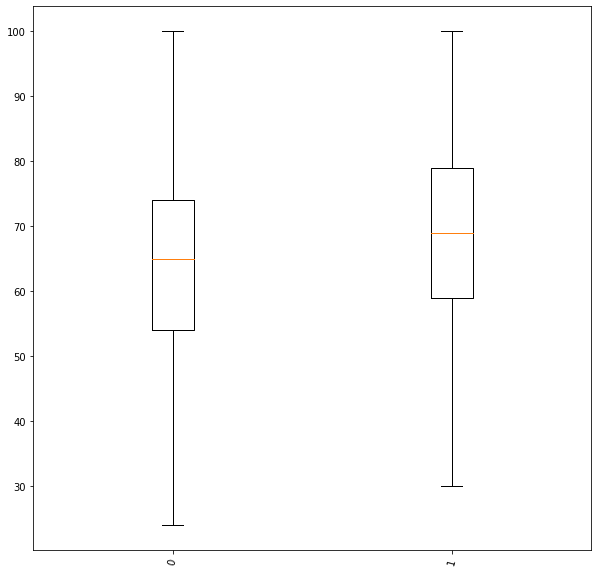

In [26]:
box_plot_gender_score("math score")

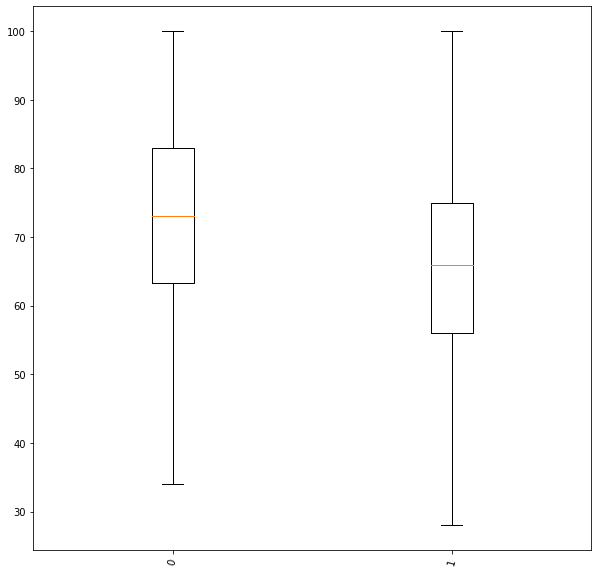

In [24]:
box_plot_gender_score("reading score")

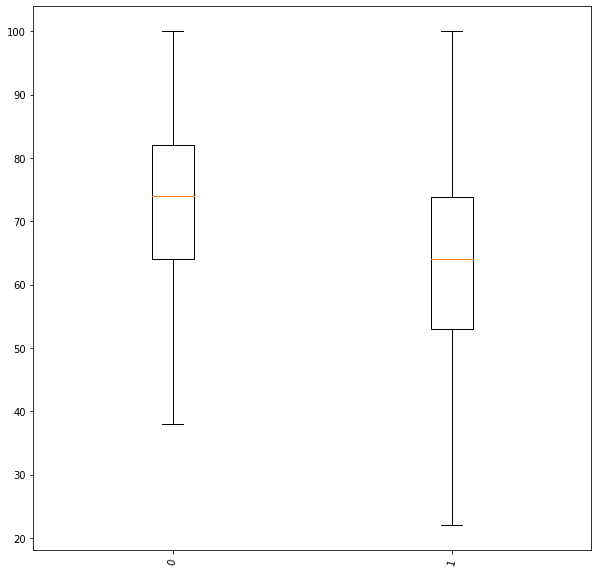

In [25]:
box_plot_gender_score("writing score")

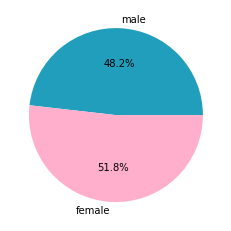

In [28]:
num_gender = [df.loc[df["gender"]==1,"gender"].count(), df.loc[df["gender"]==0,"gender"].count()]
laby = ["male", "female"]
colours = ["#219ebc","#ffafcc"]
plt.pie(num_gender,data=df, labels = laby, colors=colours, autopct='%1.1f%%')
plt.show()

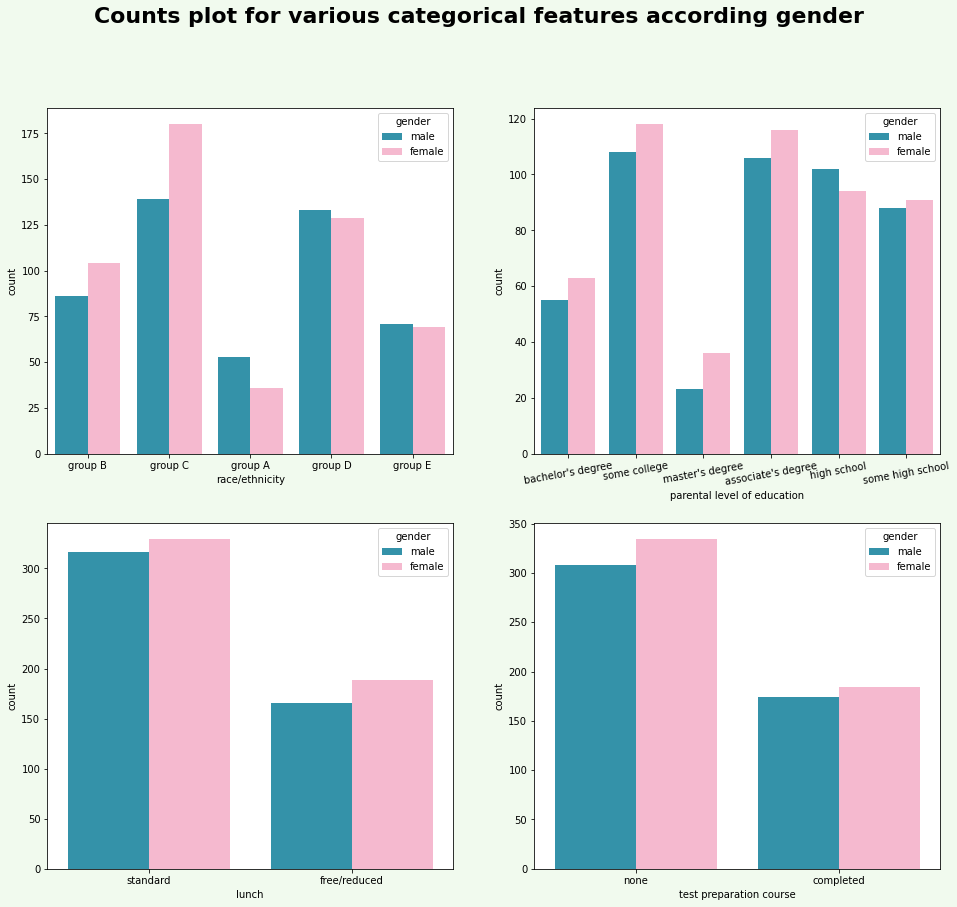

In [30]:
fig = plt.figure(figsize=(16,14), facecolor="#f1faee")
fig.suptitle(t='Counts plot for various categorical features according gender', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

sns.countplot(x="race/ethnicity",
              hue="gender",
              hue_order=["male","female"],
              palette=colours,
              ax=ax1,
              data=df)

sns.countplot(x="parental level of education", 
              hue="gender",
              hue_order=["male","female"], 
              palette=colours,
              ax=ax2,
              data=df)

sns.countplot(x="lunch", 
              hue="gender", 
              hue_order=["male","female"], 
              palette=colours,
              ax=ax3, 
              data=df)

sns.countplot(x="test preparation course",
              hue="gender", 
              hue_order=["male","female"], 
              palette=colours,
              ax=ax4 ,
              data=df)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10)
plt.show()


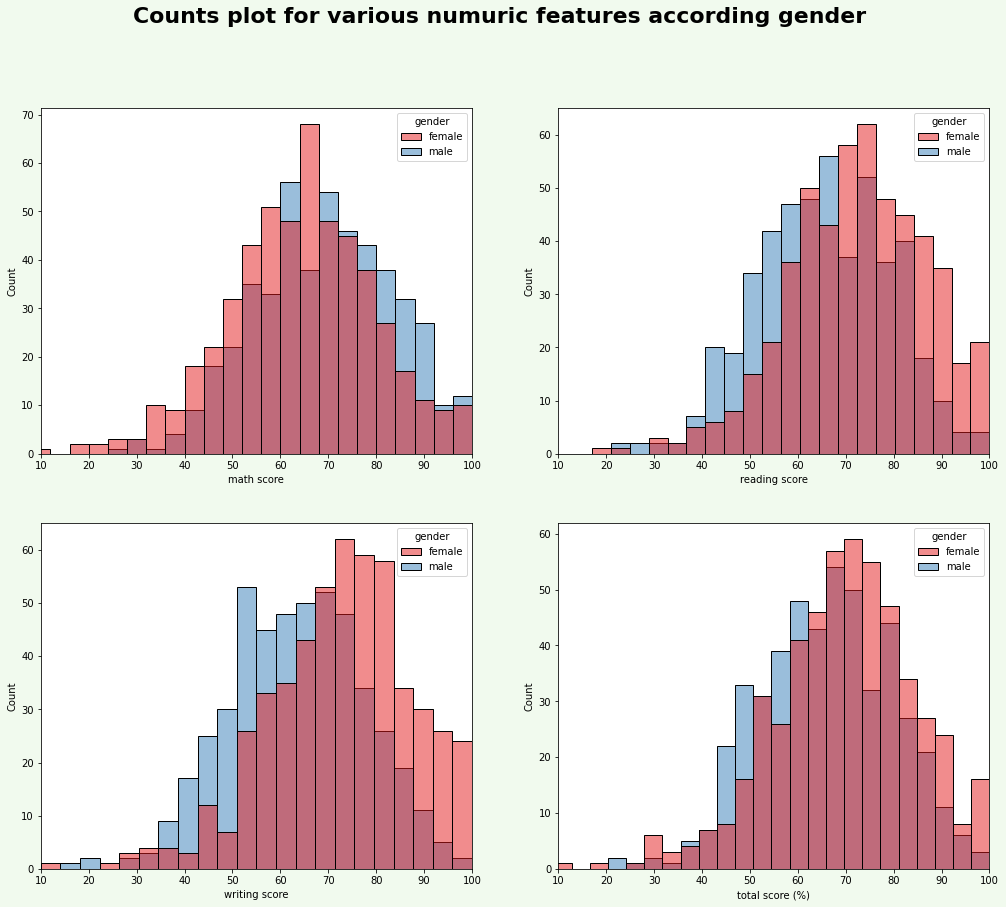

In [33]:
# gender
fig = plt.figure(figsize=(17,14), facecolor="#f1faee")
fig.suptitle(t='Counts plot for various numuric features according gender', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0],xlim=(10,100))
ax2 = fig.add_subplot(gs[0,1],xlim=(10,100))
ax3 = fig.add_subplot(gs[1,0],xlim=(10,100))
ax4 = fig.add_subplot(gs[1,1],xlim=(10,100))

sns.histplot(data=df,x="math score",hue="gender",palette="Set1", ax=ax1)
sns.histplot(data=df, x="reading score",hue="gender",palette="Set1", ax=ax2)
sns.histplot(data=df, x="writing score",hue="gender",palette="Set1", ax=ax3)
sns.histplot(data=df, x="total score (%)",hue="gender",palette="Set1", ax=ax4)

plt.show()

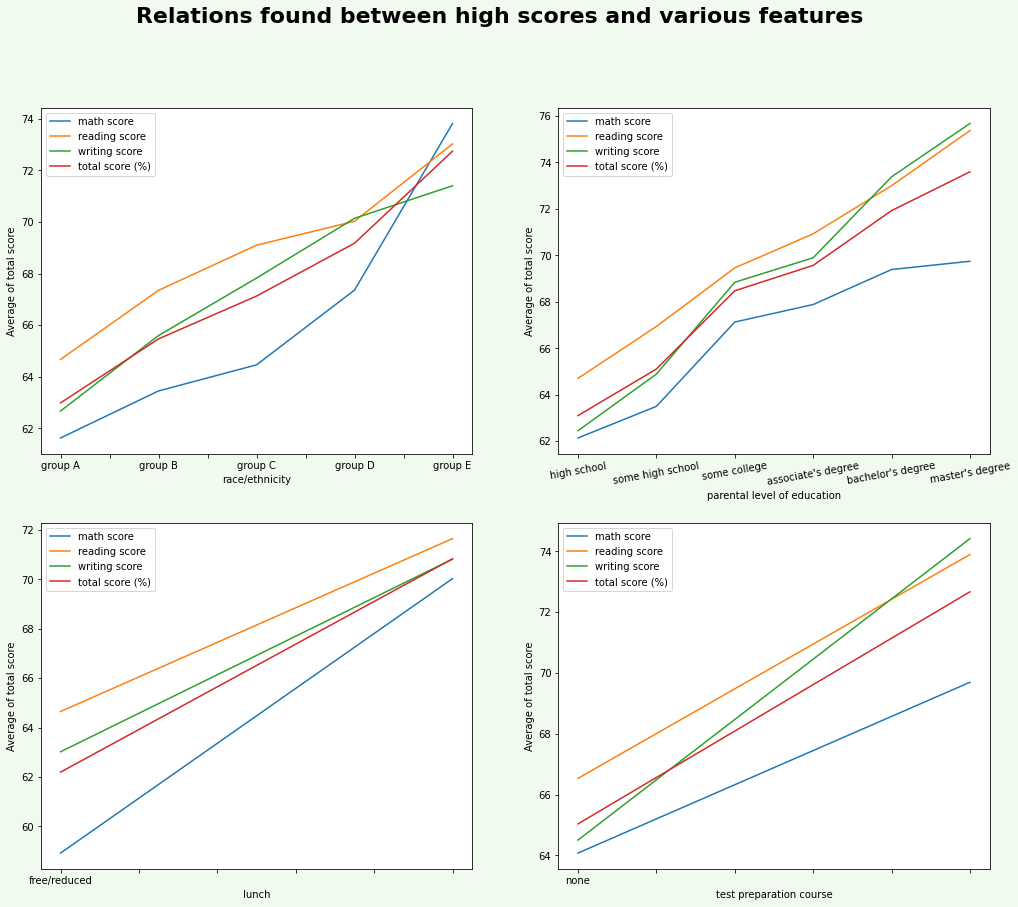

In [34]:
fig = plt.figure(figsize=(17,14), facecolor="#f1faee")
fig.suptitle(t='Relations found between high scores and various features', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ethnicity = df.groupby('race/ethnicity')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
education = df.groupby('parental level of education')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
lunch = df.groupby('lunch')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
course = df.groupby('test preparation course')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')


ethnicity.plot(ylabel="Average of total score",ax=ax1)
education.plot(ylabel="Average of total score",ax=ax2)
lunch.plot(ylabel="Average of total score",ax=ax3)
course.plot(ylabel="Average of total score",ax=ax4)


ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10)
plt.show()

<AxesSubplot:xlabel='parental level of education', ylabel='Average of total score'>

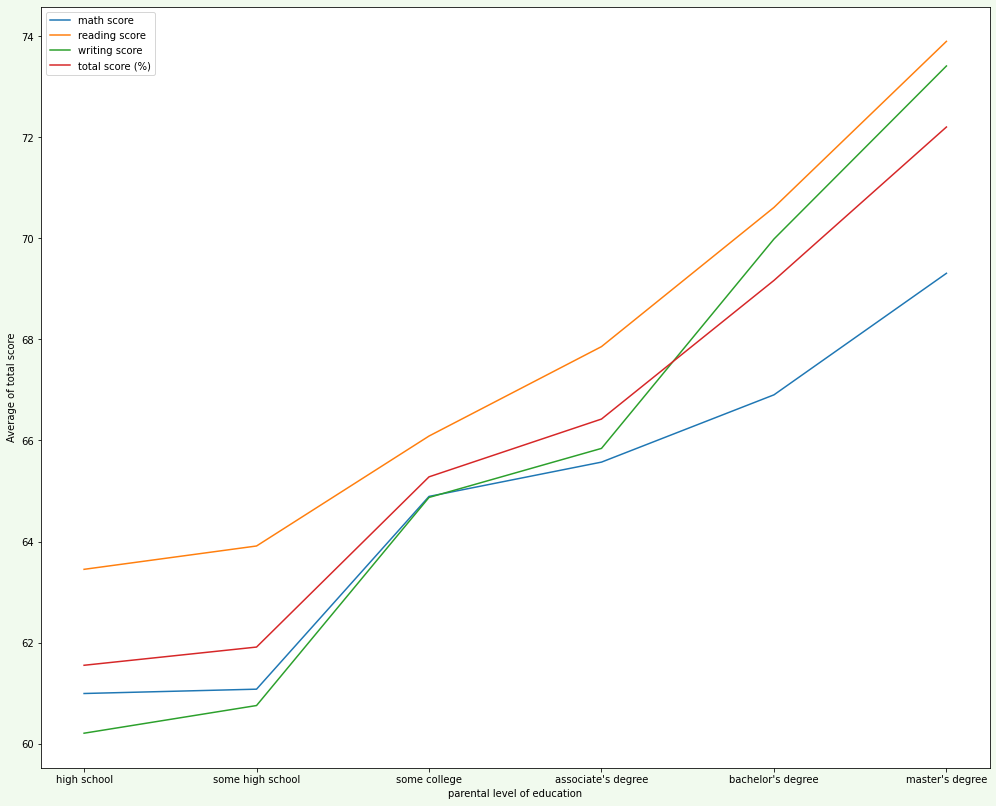

In [40]:
fig = plt.figure(figsize=(17,14), facecolor="#f1faee")
ax1 = fig.add_subplot()
education_nonetest = df[df["test preparation course"]=="none"].groupby('parental level of education')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
education_nonetest.plot(ylabel="Average of total score", ax=ax1)

In [18]:
table = df.groupby(['race/ethnicity','gender']).agg(np.sum)
table

math score  reading score  writing score
race/ethnicity gender                                          
group A        female        2107           2484           2443
               male          3378           3272           3135
group B        female        6386           7392           7285
               male          5670           5405           5179
group C        female       11166          12950          12920
               male          9398           9094           8717
group D        female        8417           9552           9678
               male          9232           8796           8700
group E        female        4886           5233           5212
               male          5449           4991           4785

In [20]:
table = df['race/ethnicity'].value_counts()
table

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [23]:
df[["gender", "race/ethnicity"]].value_counts()

gender  race/ethnicity
female  group C           180
male    group C           139
        group D           133
female  group D           129
        group B           104
male    group B            86
        group E            71
female  group E            69
male    group A            53
female  group A            36
dtype: int64